<a href="https://colab.research.google.com/github/novoa123/MachineLearningS11/blob/main/Notebook_Tarea_Zoo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [1]:
# Paso 1: Cargar el dataset

import pandas as pd


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

columns = ["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"]

df = pd.read_csv(url, names=columns)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)


from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

X = df.drop(['animal_name', 'class_type'], axis=1)

X_processed = X.copy()

legs_encoded = pd.get_dummies(X['legs'], prefix='legs')

X_processed.drop(['legs'], axis=1)
X_processed = pd.concat([X_processed, legs_encoded], axis=1)


In [7]:
scaler = StandardScaler()
X_processed_scaled = scaler.fit_transform(X_processed)

In [8]:
X_scaled_df = pd.DataFrame(X_processed_scaled, columns=X_processed.columns)
X_scaled_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,legs,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.572540,-1.698416,-0.384353,1.138180,-0.543021,-0.60404,1.287593,-0.1,-0.331497,-0.142134
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,...,0.572540,0.588784,-0.384353,1.138180,-0.543021,-0.60404,1.287593,-0.1,-0.331497,-0.142134
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,...,-1.404435,0.588784,-0.384353,-0.878595,1.841549,-0.60404,-0.776643,-0.1,-0.331497,-0.142134
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.572540,-1.698416,-0.384353,1.138180,-0.543021,-0.60404,1.287593,-0.1,-0.331497,-0.142134
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,...,0.572540,0.588784,-0.384353,1.138180,-0.543021,-0.60404,1.287593,-0.1,-0.331497,-0.142134


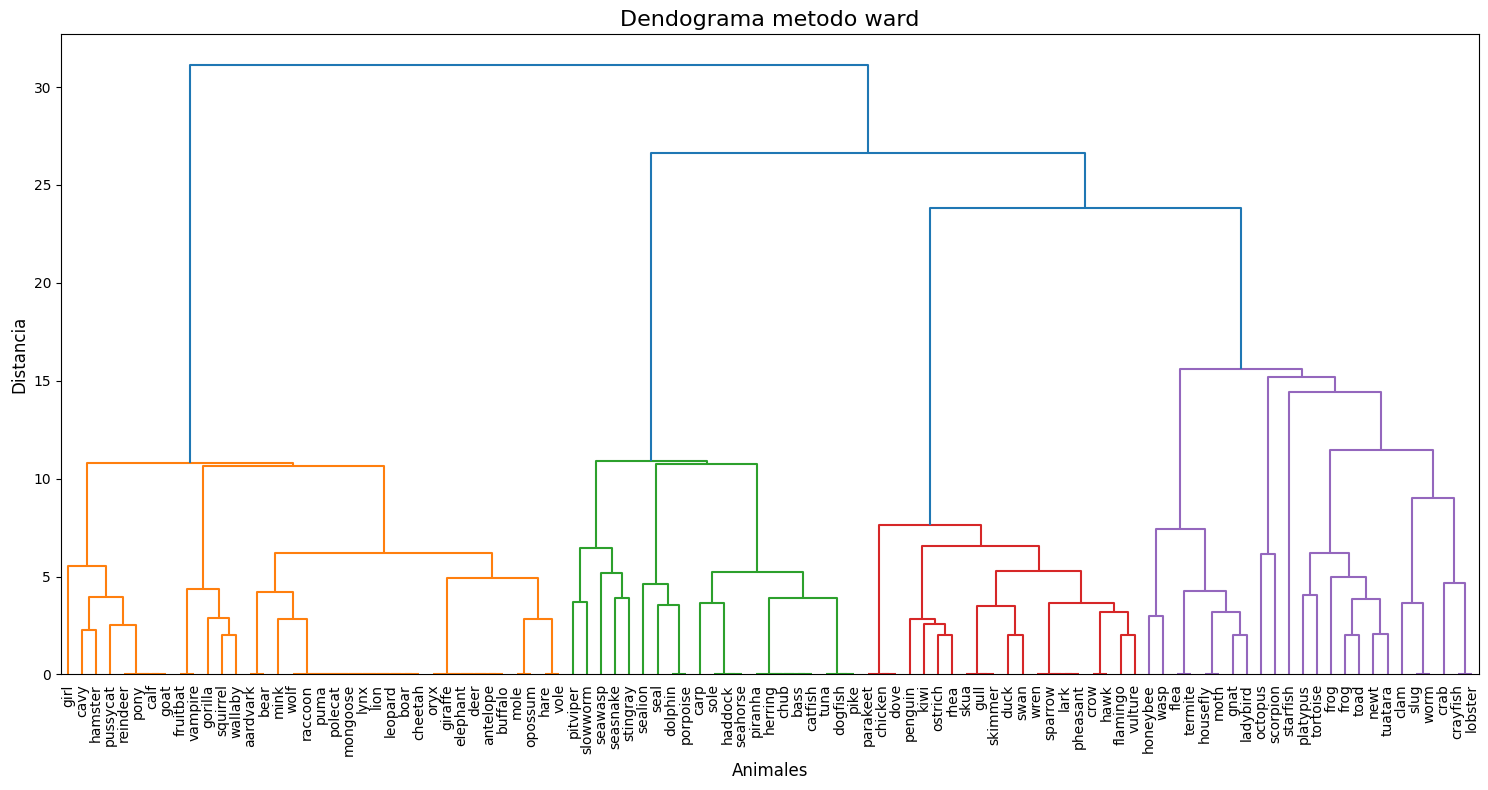

In [10]:
# Paso 3: Clustering Jerárquico

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

linkage_methods = ['ward', 'complete', 'average', 'single']

Z = linkage(X_scaled_df, method='ward')

plt.figure(figsize = (15, 8))

dendrogram(Z,
           labels = df['animal_name'].values,
           leaf_rotation = 90,
           leaf_font_size = 10)
plt.title('Dendograma metodo ward', fontsize = 16)
plt.xlabel('Animales', fontsize = 12)
plt.ylabel('Distancia', fontsize = 12)
plt.tight_layout()
plt.show()

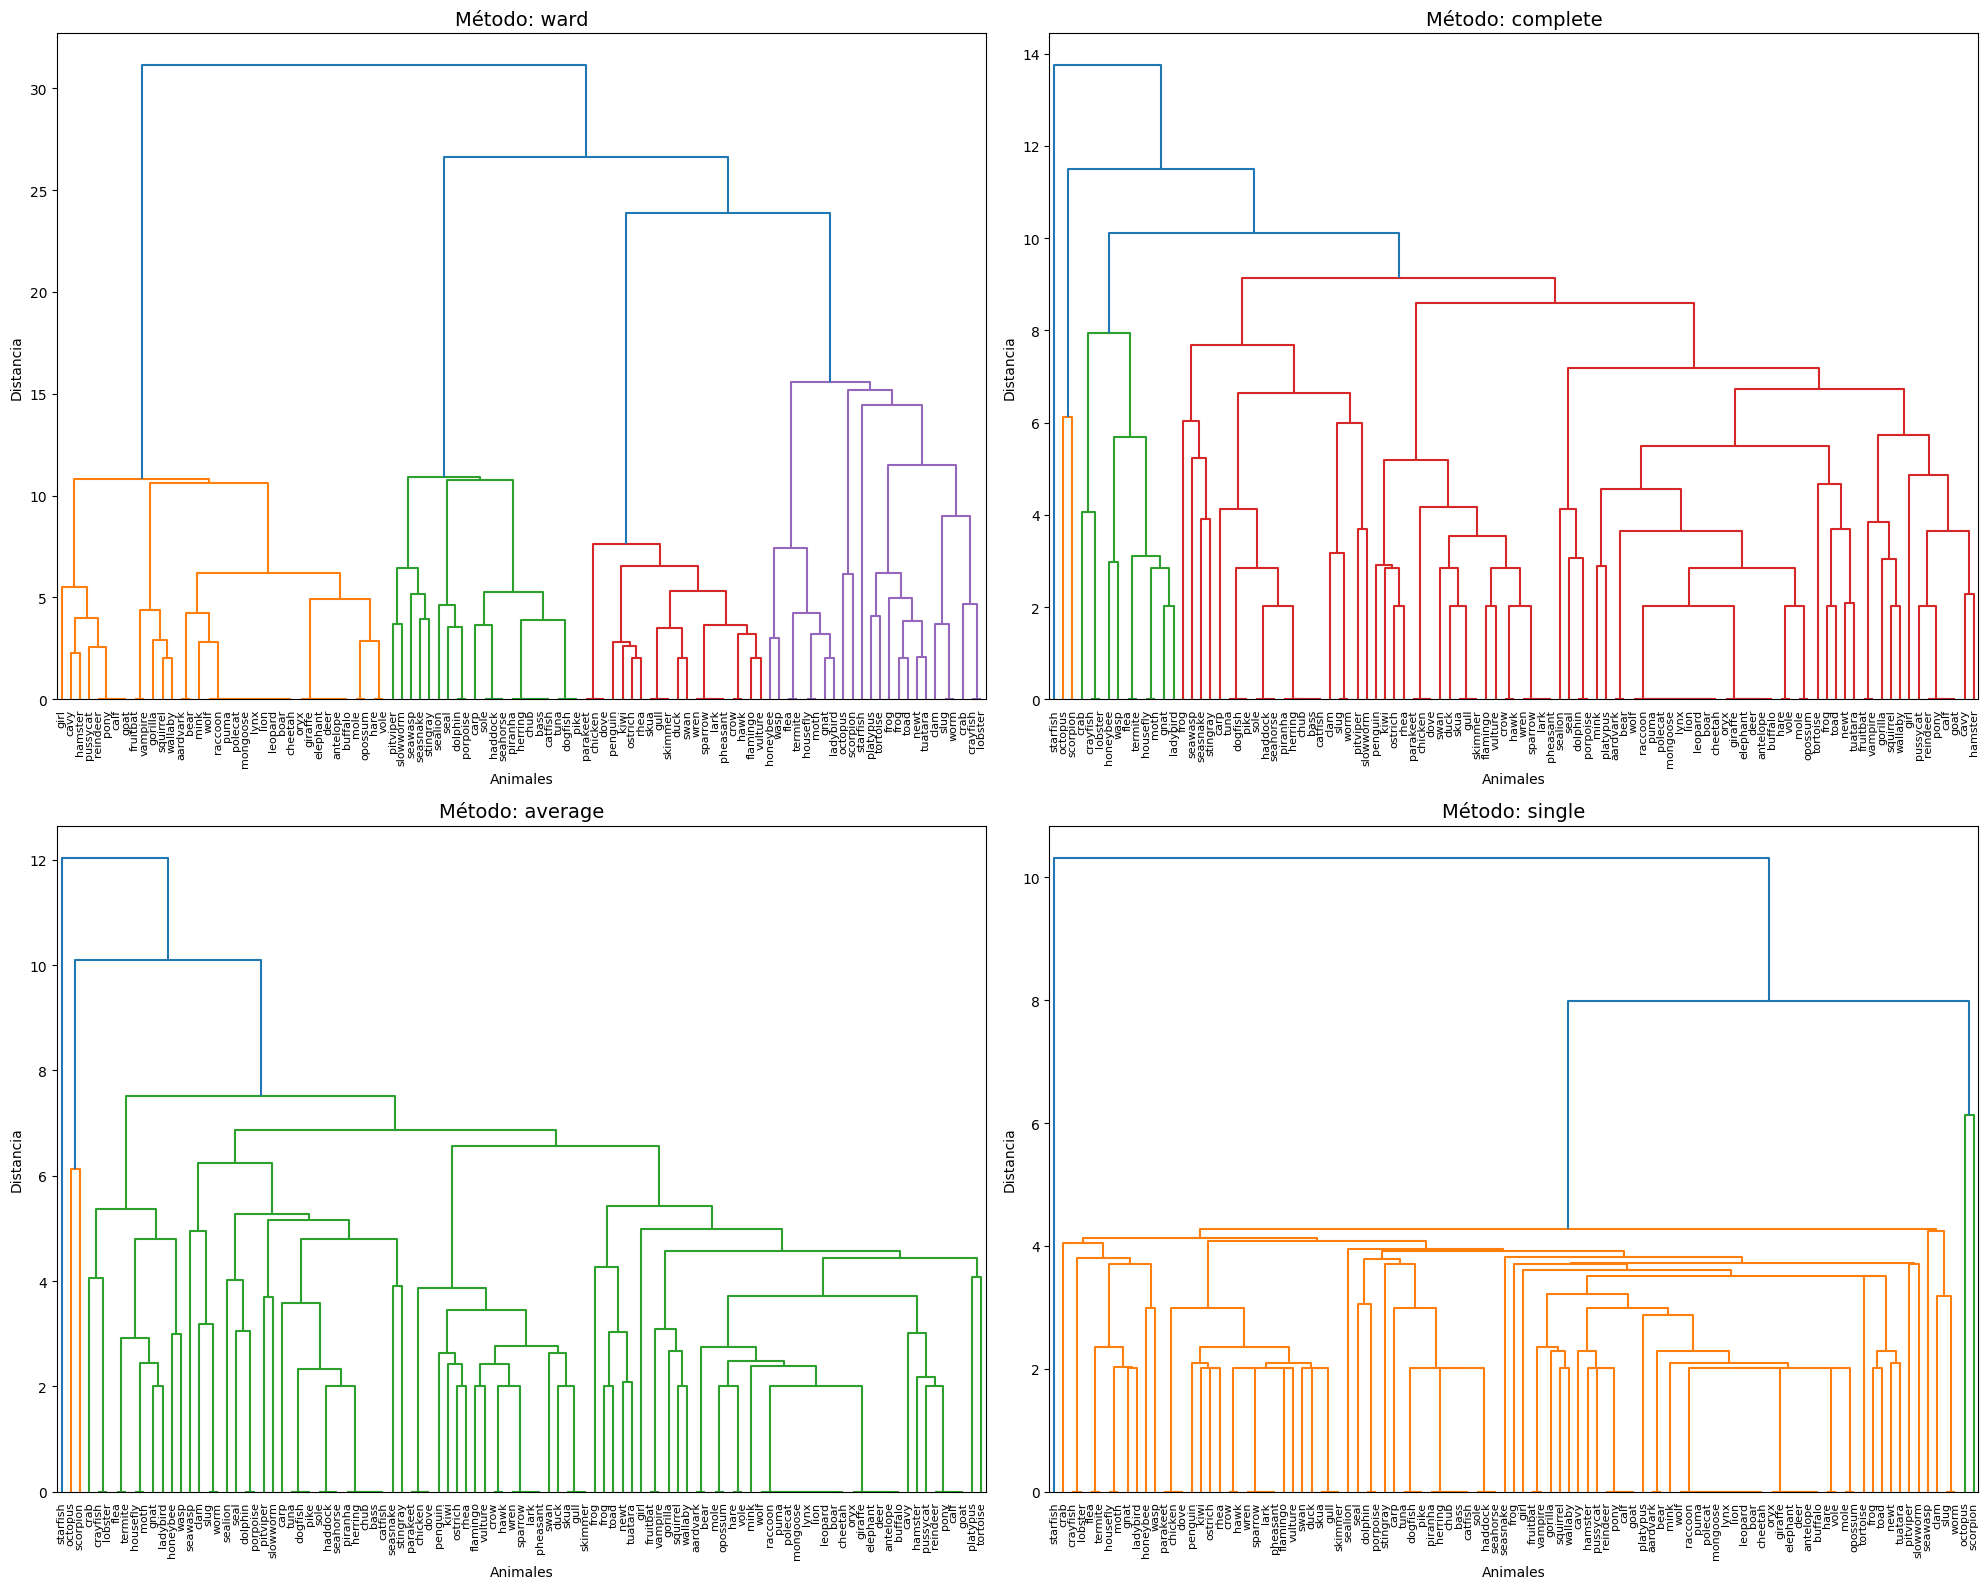

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
  Z_temp = linkage(X_processed_scaled, method = method)
  ax = axes[idx]
  dendrogram(Z_temp,
           labels = df['animal_name'].values,
           leaf_rotation = 90,
           leaf_font_size = 8,
           ax=ax)
  ax.set_title(f'Método: {method}', fontsize=14)
  ax.set_xlabel('Animales', fontsize=10)
  ax.set_ylabel('Distancia', fontsize=10)

plt.tight_layout()
plt.show()


In [20]:
from scipy.cluster.hierarchy import fcluster

n_clusters = 7
clusters = fcluster(Z, n_clusters, criterion='maxclust')

df['cluster'] = clusters

print('Animales por cluster:')
for i in range(1, n_clusters + 1):
  print(f"\nCluster {i}:")
  animals = df[df['cluster'] == i]['animal_name'].values
  print(', '.join(animals))

Animales por cluster:

Cluster 1:
aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, polecat, pony, puma, pussycat, raccoon, reindeer, squirrel, vampire, vole, wallaby, wolf

Cluster 2:
bass, carp, catfish, chub, dogfish, dolphin, haddock, herring, pike, piranha, pitviper, porpoise, seahorse, seal, sealion, seasnake, seawasp, slowworm, sole, stingray, tuna

Cluster 3:
chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

Cluster 4:
flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

Cluster 5:
octopus, scorpion

Cluster 6:
clam, crab, crayfish, frog, frog, lobster, newt, platypus, slug, toad, tortoise, tuatara, worm

Cluster 7:
starfish


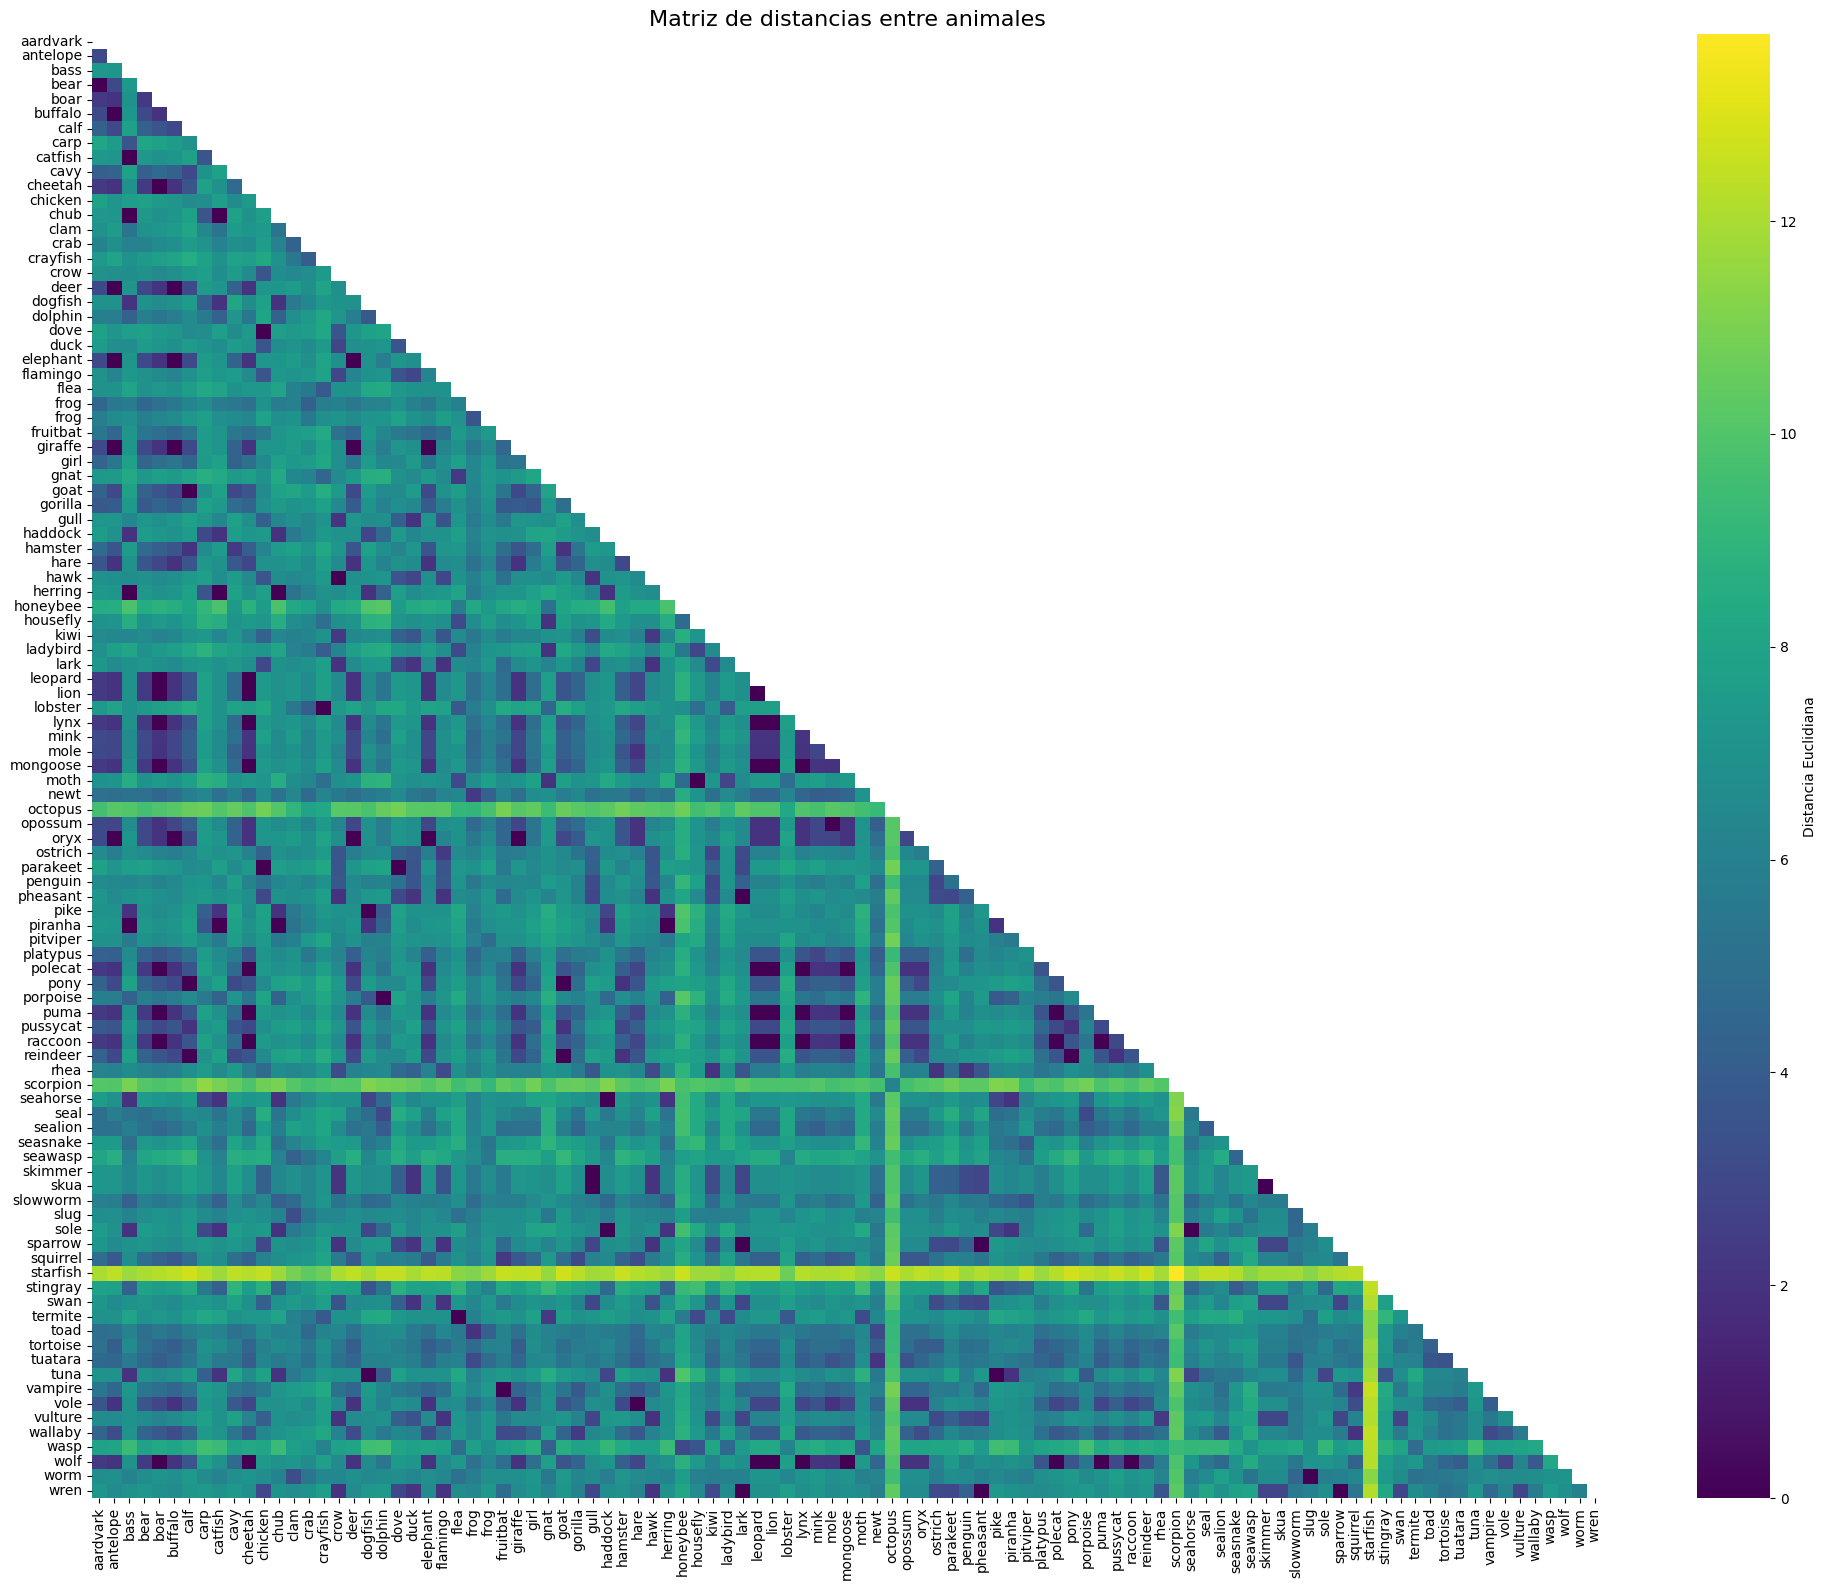

In [21]:
# Paso 4: Heatmap

from scipy.spatial.distance import squareform

dist_matrix = pdist(X_processed_scaled, metric = 'euclidean')
dist_square = squareform(dist_matrix)

plt.figure(figsize=(20,16))
mask = np.triu(np.ones_like(dist_square, dtype = bool))
sns.heatmap(dist_square,
            xticklabels=df['animal_name'].values,
            yticklabels=df['animal_name'].values,
            mask=mask,
            cmap = 'viridis',
            cbar_kws={'label': 'Distancia Euclidiana'})

plt.title('Matriz de distancias entre animales', fontsize = 16)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


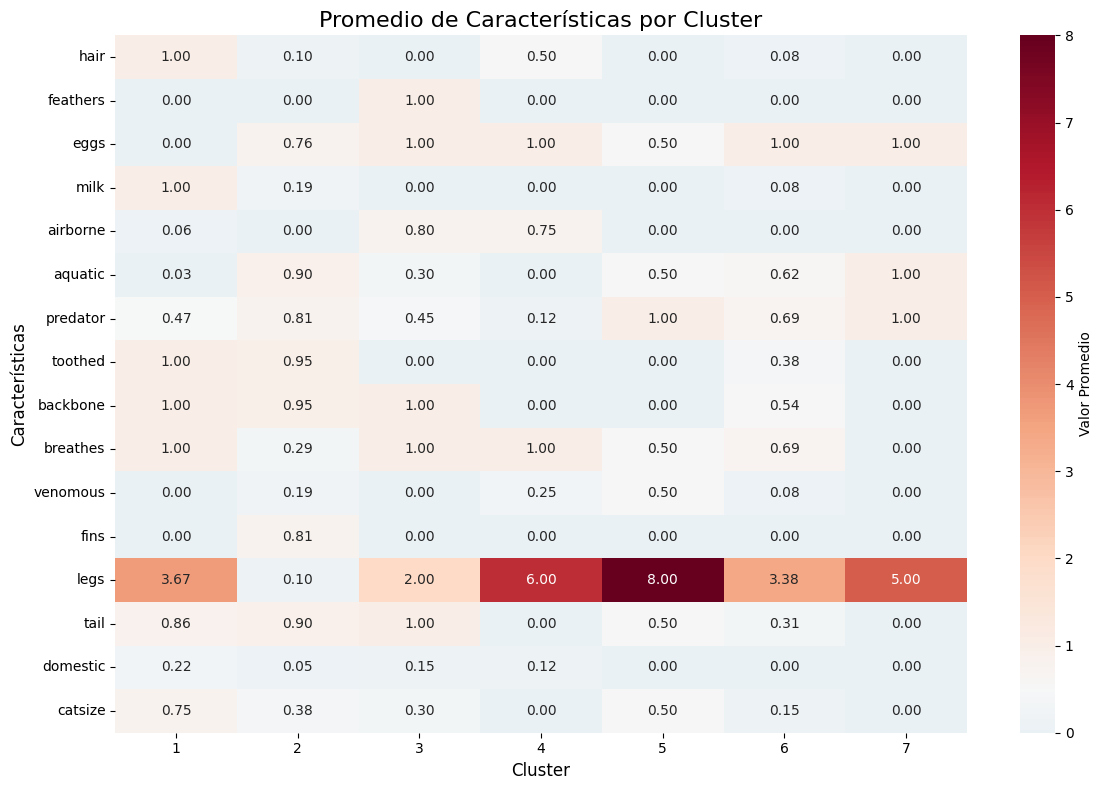

In [22]:
cluster_means = df.groupby('cluster')[X.columns].mean()

plt.figure(figsize = (12,8))
sns.heatmap(cluster_means.T,
            cmap='RdBu_r',
            center=0.5,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Valor Promedio'})

plt.title('Promedio de Características por Cluster', fontsize = 16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print(f"Adjusted Rand Score: {adjusted_rand_score(df['class_type'], clusters):.3f}")
print(f"Normalized Mutual Information: {normalized_mutual_info_score(df['class_type'], clusters):.3f}")

Adjusted Rand Score: 0.777
Normalized Mutual Information: 0.789


In [24]:
contingency = pd.crosstab(df['cluster'], df['class_type'])
print("\nTabla de contingencia (Cluster vs Clase Real):")
print(contingency)


Tabla de contingencia (Cluster vs Clase Real):
class_type   1   2  3   4  5  6  7
cluster                           
1           36   0  0   0  0  0  0
2            4   0  3  13  0  0  1
3            0  20  0   0  0  0  0
4            0   0  0   0  0  8  0
5            0   0  0   0  0  0  2
6            1   0  2   0  4  0  6
7            0   0  0   0  0  0  1


# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

En el dendrograma se pueden identificar entre 5 y 7 clusters principales. Al cortar el dendrograma a diferentes alturas, observamos que 7 clusters es un numero optimo que coincide con las 7 clases originales del dataset.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las caracteristicas mas determinantes son:

backbone: separa vertebrados de invertebrados.

milk: identifica mamiferos.

feathers: identifica aves.

aquatic: agrupa animales acuaticos.

legs: diferencias entre insectos, aracnidos y otros grupos

eggs: separa oviparos de viviparos

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Los resultados tienen sentido biologico, ya que el clustering agrupa:

Mamiferost terrestres

Aves

Animales acutaticos

Invertebrados

Reptiles y anfibios

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

La normalizacion es crucial para el clustering, ya que evita que caracteristicas con diferentes escalas dominen el calculo de las distancias. En este caso, la variable legs tiene valores de 0 a 8, mientras que las demas son binarias, por lo que sin normalizacion, el numero de patas tendria un peso desproporcionado.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Utilice como principal el metodo de ward linkage porque minimiza la varianza intra cluster, produce clusters mas compactos y esfericos, genera dendrogramas mas interpretables, y para este dataset, produce arupaciones que coinciden mejor con las clases biologicas reales

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Dependiendo de la perspectiva que se quiera obtener, seria posible usar:

K-means: para comparar con clustering particional y validar el numero optimo de clusters.

DBSCAN: para identificar outliers.

Gaussian Mixture Models: para modelar la incertidumbre en la asignacion de clusters.

Fuzzy C-means: para animales que puedan pertenecer a multiples categorias